# Notebook Setup

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

# Standard Imports

In [2]:
# Third-party imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets

In [56]:
sns.set_theme(
    style="darkgrid",          # Fundo com grid escuro
    palette="husl",           # Paleta de cores vibrantes
    rc={
        'figure.facecolor': '#0e1117',    # Cor de fundo da figura
        'axes.facecolor': '#0e1117',      # Cor de fundo dos eixos
        'grid.color': '#2a2d3c',          # Cor do grid
        'text.color': '#ffffff',          # Cor do texto
        'axes.labelcolor': '#ffffff',     # Cor dos labels
        'xtick.color': '#ffffff',         # Cor dos ticks do eixo x
        'ytick.color': '#ffffff',         # Cor dos ticks do eixo y
        'axes.edgecolor': '#ffffff'       # Cor da borda dos eixos
    }
)

# Load Data
Vamos carregar o dataset de Iris usando a própria library do scikit-learn

In [6]:
data = datasets.load_iris()

In [7]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [10]:
data['data'][:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [11]:
data['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [12]:
data['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [13]:
data['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

## O problema que a gente está querendo resolver
Problema clássico de multiclass classification. Onde nós queremos prever três classes, especificamente a espécie da Iris Flower, _Setosa_, _Versicolor_, _Virginica_.


## Criar o pandas DataFrame a partir de 'data'

In [16]:
df = pd.DataFrame(data=data['data'], columns=data['feature_names'])

In [17]:
df['target'] = data['target']

In [18]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# Basic Descriptive Statistics

In [19]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


## Distributions of features and target

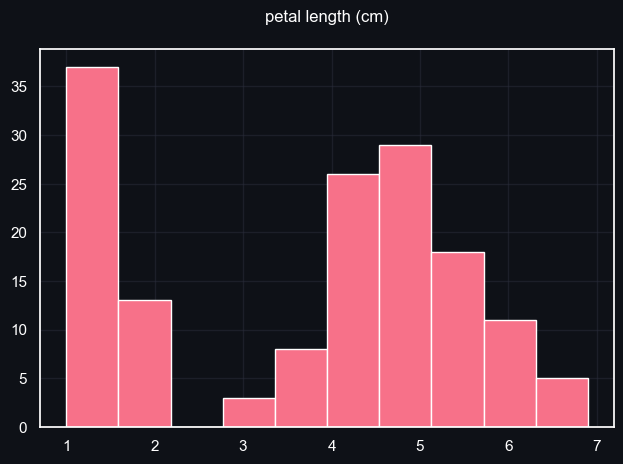

In [57]:
col = 'petal length (cm)'

df[col].hist()
plt.title(col, y=1.05)
plt.show()

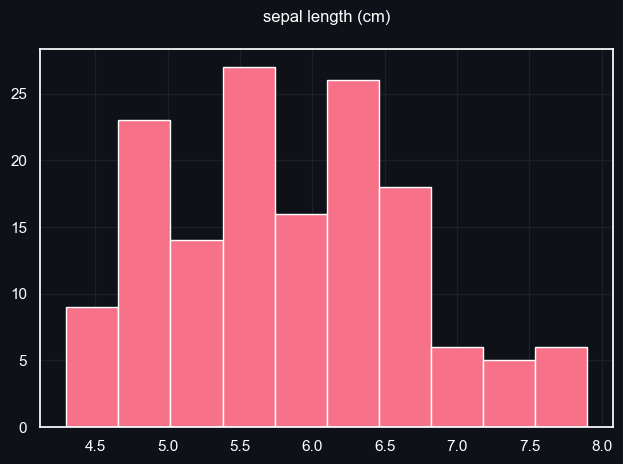

In [58]:
col = 'sepal length (cm)'

df[col].hist()
plt.title(col, y=1.05)
plt.show()

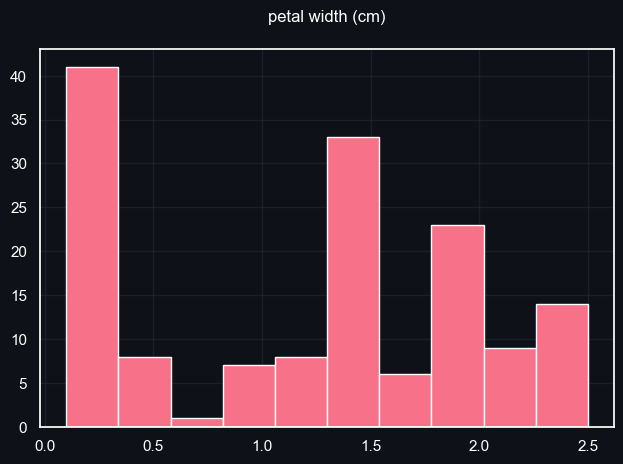

In [59]:
col = 'petal width (cm)'

df[col].hist()
plt.title(col, y=1.05)
plt.show()

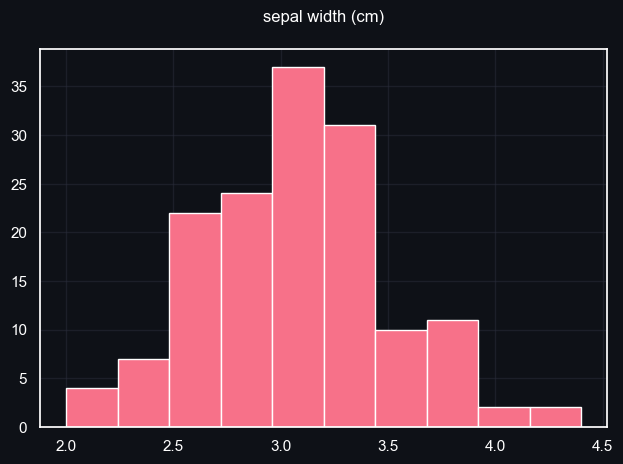

In [60]:
col = 'sepal width (cm)'

df[col].hist()
plt.title(col, y=1.05)
plt.show()

# Relationship of the data features with the target

In [71]:
# Criar a nova coluna com o nome das espécies, usando map
df['target_name'] = df['target'].map({
    0: 'Setosa',
    1: 'Versicolor',
    2: 'Virginica'
})

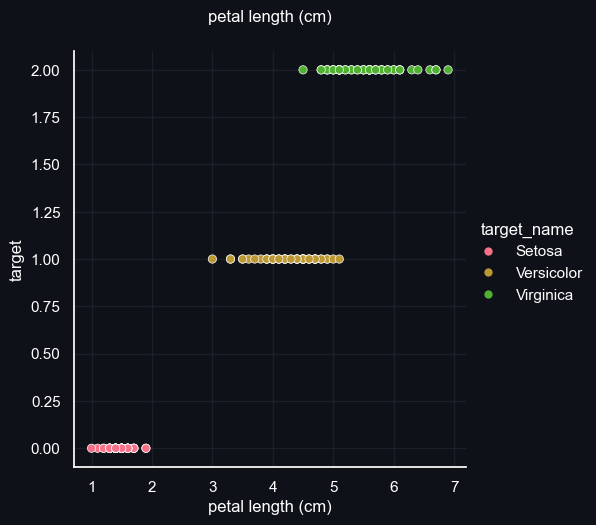

In [72]:
col = 'petal length (cm)'
sns.relplot(x=col, y='target', hue='target_name', data=df)
plt.title(col, y=1.05)
plt.show()

# Exploratory Data Analysis (EDA) - Pairplot

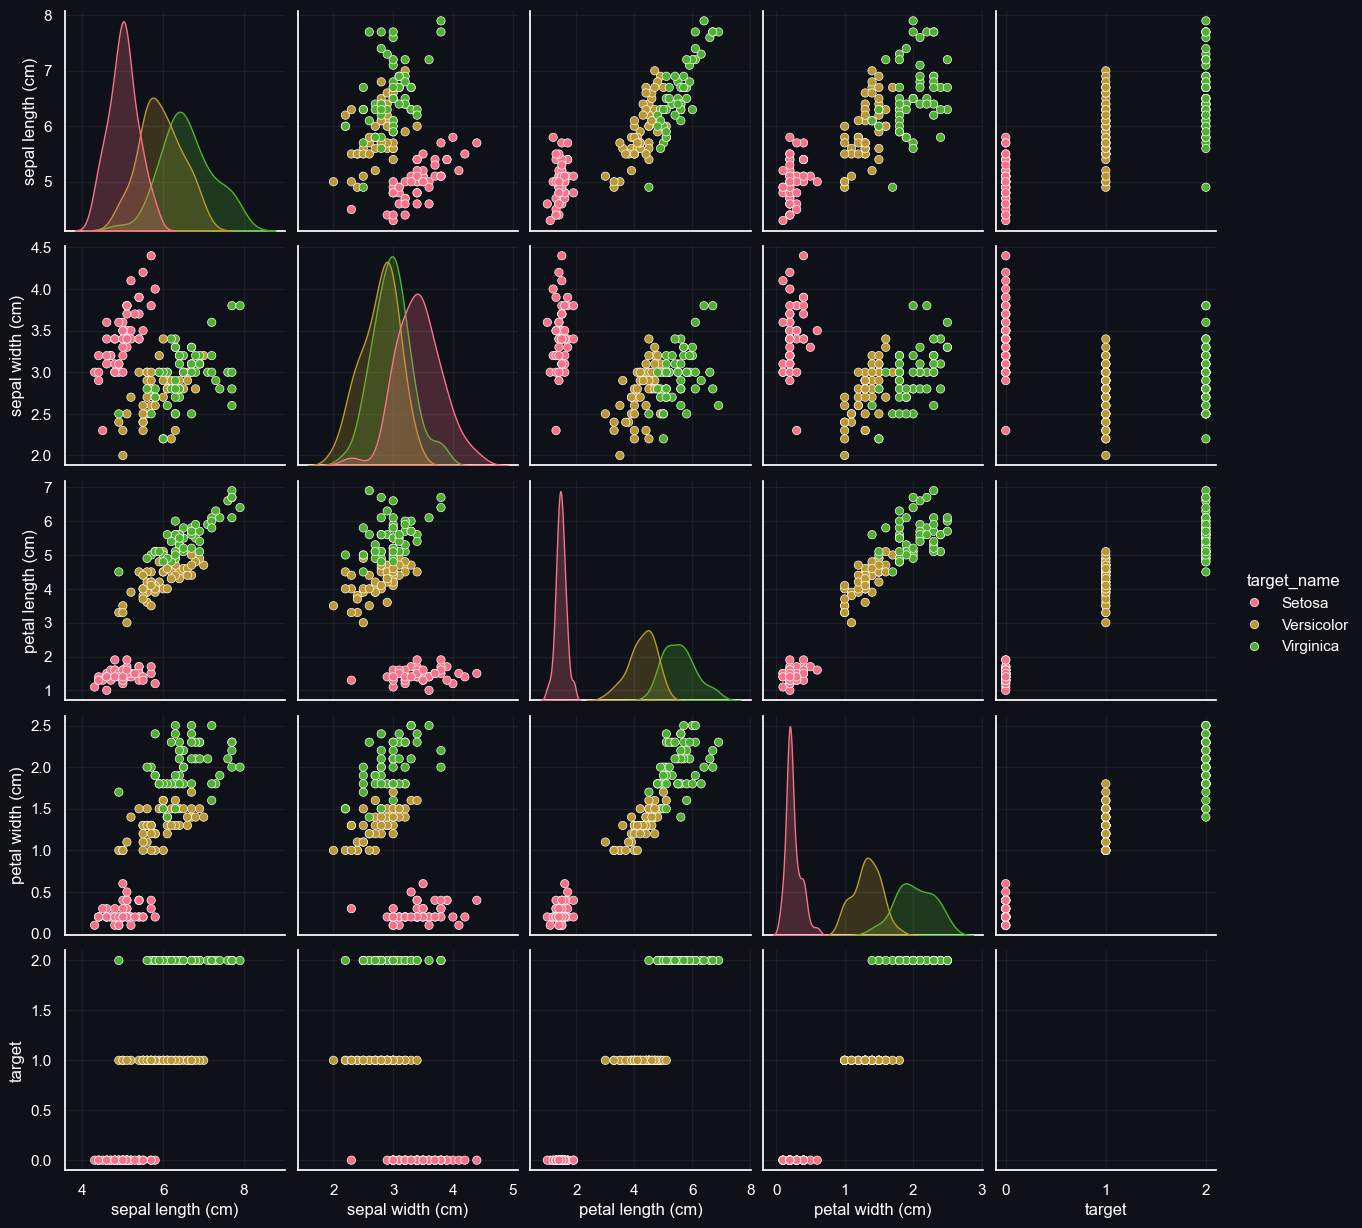

In [75]:
sns.pairplot(df, hue='target_name')

## Train Test Split
Nós nunca subimos os dados de treino para o modelo, subimos para 'produção' apenas os dados de **teste**.
Os dados de treino a gente realmente utiliza para treinar o modelo.
A proporção entre os dados de treino e de teste variam, mas tem como padrão ser:
- _20% para teste_
- _80% para treino_

In [76]:
from sklearn.model_selection import train_test_split

In [78]:
df_train, df_test = train_test_split(df, test_size=0.2)

In [82]:
df_train.shape

(120, 6)

In [83]:
df_test.shape

(30, 6)

# Prepare our data for modeling
Isso envolve dividir o dataset de volta para Numpy Arrays.

In [90]:
X_train = df_train.drop(columns=['target', 'target_name'], axis=1).values
y_train = df_train['target'].values

# Modeling - Logistic Regression

In [91]:
from sklearn.linear_model import LogisticRegression

## Using a validation set to evaluate our model
Separamos uma parte do nosso train dataset para validação, para ver o que o nosso modelo está fazendo.

In [93]:
model = LogisticRegression()

In [96]:
# Xt significa 'X_train', Xv significa 'X_validation'
Xt, Xv, yt, yv = train_test_split(X_train, y_train, test_size=0.2)

In [ ]:
# Ajusta o modelo para os dados de treino
model.fit(Xt, yt)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [ ]:
# Pega os resultados do modelo usando os dados de validação
model.score(Xv, yv)

0.9583333333333334

# Using Cross-Validation para subir o modelo para produção
Cross-Validation basicamente 

In [103]:
from sklearn.model_selection import cross_val_predict, cross_val_score

In [106]:
model = LogisticRegression(max_iter=200)

In [108]:
accuracies = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')

In [109]:
np.mean(accuracies)

0.95

# Where are we misclassifying points?

In [110]:
y_pred = cross_val_predict(model, X_train, y_train, cv=5)

In [112]:
predicted_correctly_mask = y_pred == y_train

In [113]:
not_predicted_correctly = ~predicted_correctly_mask

In [114]:
X_train[not_predicted_correctly]

array([[6.3, 2.5, 4.9, 1.5],
       [6. , 2.7, 5.1, 1.6],
       [6. , 3. , 4.8, 1.8],
       [5.9, 3.2, 4.8, 1.8],
       [6. , 2.2, 5. , 1.5],
       [6.3, 2.8, 5.1, 1.5]])

In [115]:
df_predictions = df_train.copy()

In [116]:
df_predictions['Correct Prediction'] = predicted_correctly_mask

In [117]:
df_predictions.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name,Correct Prediction
1,4.9,3.0,1.4,0.2,0,Setosa,True
27,5.2,3.5,1.5,0.2,0,Setosa,True
59,5.2,2.7,3.9,1.4,1,Versicolor,True
94,5.6,2.7,4.2,1.3,1,Versicolor,True
96,5.7,2.9,4.2,1.3,1,Versicolor,True


In [118]:
df_predictions['Prediction'] = y_pred

In [119]:
df_predictions['Prediction_Label'] = df_predictions['Prediction'].map({
    0: 'Setosa',
    1: 'Versicolor',
    2: 'Virginica'
})

In [120]:
df_predictions.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name,Correct Prediction,Prediction,Prediction_Label
1,4.9,3.0,1.4,0.2,0,Setosa,True,0,Setosa
27,5.2,3.5,1.5,0.2,0,Setosa,True,0,Setosa
59,5.2,2.7,3.9,1.4,1,Versicolor,True,1,Versicolor
94,5.6,2.7,4.2,1.3,1,Versicolor,True,1,Versicolor
96,5.7,2.9,4.2,1.3,1,Versicolor,True,1,Versicolor


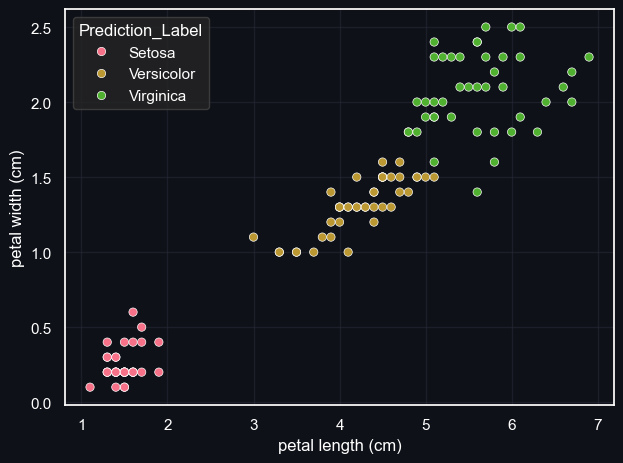

In [123]:
sns.scatterplot(x='petal length (cm)',
                y='petal width (cm)', data=df_predictions,
                hue='Prediction_Label')
plt.show()

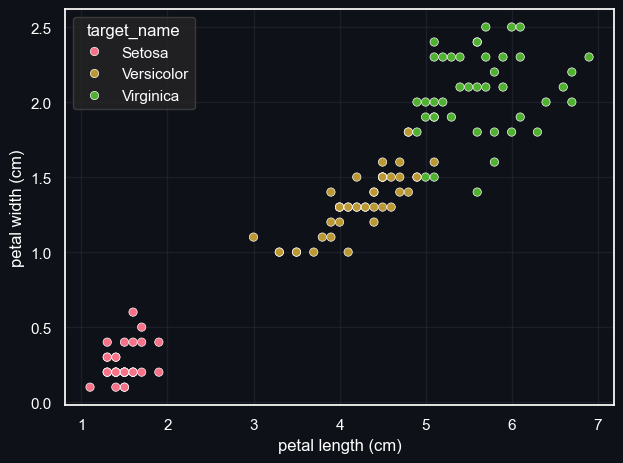

In [124]:
sns.scatterplot(x='petal length (cm)',
                y='petal width (cm)', data=df_predictions,
                hue='target_name')
plt.show()

In [141]:
def plot_incorrect_predictions(df_predictions, x_axis_feature, y_axis_feature):
    fig, axs = plt.subplots(2, 2, figsize=(10, 10))
    axs = axs.flatten()
    sns.scatterplot(x=x_axis_feature, y=y_axis_feature,
                    hue='Prediction_Label', data=df_predictions, ax=axs[0])
    sns.scatterplot(x=x_axis_feature, y=y_axis_feature,
                    hue='target_name', data=df_predictions, ax=axs[1])
    sns.scatterplot(x=x_axis_feature, y=y_axis_feature,
                    hue='Correct Prediction', data=df_predictions, ax=axs[2])
    axs[3].set_visible(False)

    plt.show()

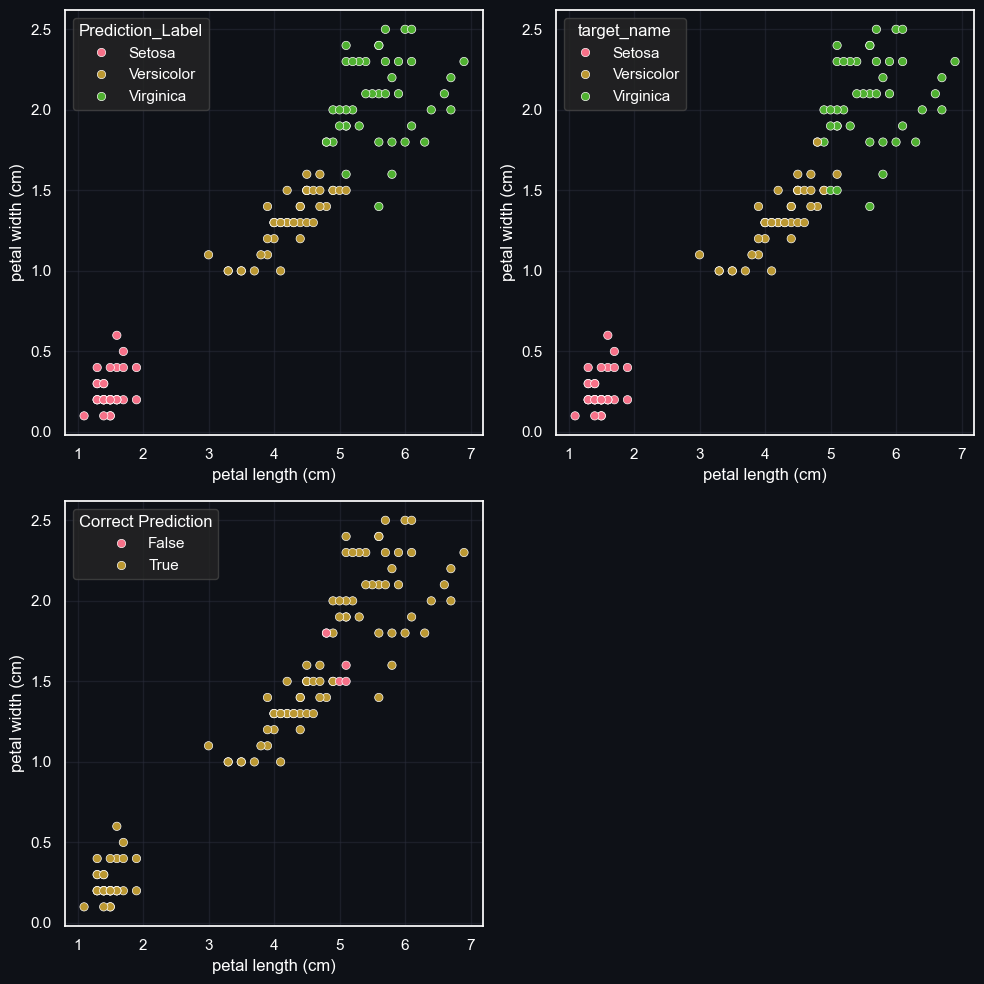

In [142]:
plot_incorrect_predictions(
    df_predictions, 'petal length (cm)', 'petal width (cm)')

# Model Tuning
O que é Model Tuning?
Model Tuning é tentar determinar os parâmetros do nosso modelo (também conhecidos como hiper parâmetros) que maximizam a performance do nosso modelo

In [153]:
for reg_param in (0.1, 0.05, 0.045, 0.04, 0.23, 0.3, 0.9, 1, 1.3, 1.9, 3, 4, 6, 8):
    print(reg_param)
    model = LogisticRegression(max_iter=200, C=reg_param)
    accuracies = cross_val_score(
        model, X_train, y_train, cv=5, scoring='accuracy')
    print(f"Accuracy: {np.mean(accuracies) * 100:.2f}%")

0.1
Accuracy: 95.83%
0.05
Accuracy: 92.50%
0.045
Accuracy: 92.50%
0.04
Accuracy: 92.50%
0.23
Accuracy: 95.00%
0.3
Accuracy: 95.83%
0.9
Accuracy: 95.00%
1
Accuracy: 95.00%
1.3
Accuracy: 95.00%
1.9
Accuracy: 95.00%
3
Accuracy: 95.00%
4
Accuracy: 95.00%
6
Accuracy: 95.00%
8
Accuracy: 95.00%


# Final Model

In [154]:
model = LogisticRegression(max_iter=200, C=0.1)

## O quão bom nosso modelo se sai nos datasets de tests?

In [155]:
X_test = df_test.drop(columns=['target', 'target_name'], axis=1).values
y_test = df_test['target'].values

In [156]:
X_test.shape

(30, 4)

In [157]:
y_test

array([1, 1, 0, 0, 0, 0, 1, 2, 0, 1, 0, 1, 0, 0, 0, 2, 0, 2, 1, 2, 0, 2,
       1, 0, 0, 0, 1, 0, 2, 2])

### Treinar nosso modelo final usando nosso Training Dataset COMPLETO

In [158]:
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,0.1
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,200
,multi_class,'deprecated'


In [159]:
y_test_pred = model.predict(X_test)

In [160]:
test_set_correctly_classified = y_test_pred == y_test
test_set_accuracy = np.mean(test_set_correctly_classified)

In [161]:
print(f"Test set Accuracy: {test_set_accuracy * 100:.2f}%")

Test set Accuracy: 93.33%


In [162]:
test_set_correctly_classified

array([ True,  True,  True,  True,  True,  True,  True, False,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [167]:
df_predictions_test = df_test.copy()
df_predictions_test['Correct Prediction'] = test_set_correctly_classified
df_predictions_test['Prediction'] = y_test_pred
df_predictions_test['Prediction_Label'] = df_predictions_test['Prediction'].map({
    0: 'Setosa',
    1: 'Versicolor',
    2: 'Virginica'
})

In [168]:
df_predictions_test.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name,Correct Prediction,Prediction,Prediction_Label
91,6.1,3.0,4.6,1.4,1,Versicolor,True,1,Versicolor
68,6.2,2.2,4.5,1.5,1,Versicolor,True,1,Versicolor
0,5.1,3.5,1.4,0.2,0,Setosa,True,0,Setosa
21,5.1,3.7,1.5,0.4,0,Setosa,True,0,Setosa
19,5.1,3.8,1.5,0.3,0,Setosa,True,0,Setosa


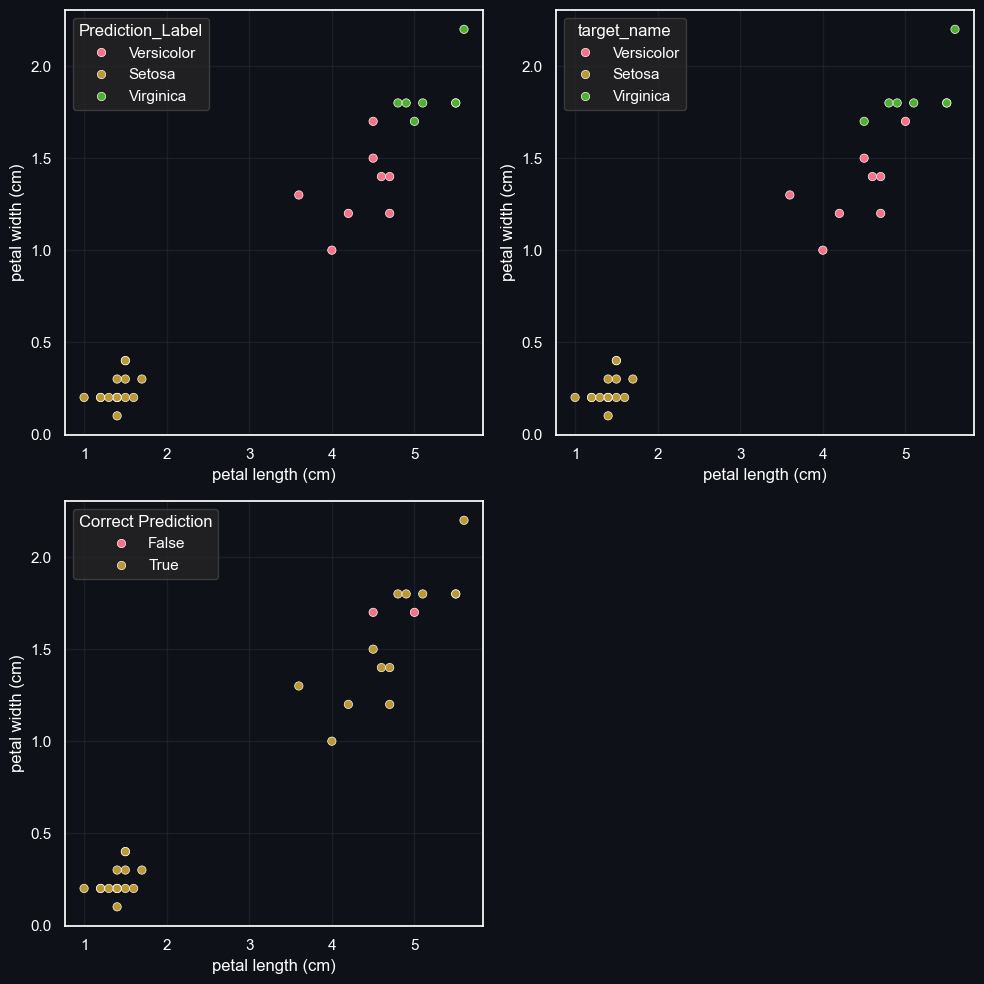

In [169]:
plot_incorrect_predictions(
    df_predictions_test, x_axis_feature='petal length (cm)', y_axis_feature='petal width (cm)')

# Conclusão

Nós atingimos exatamente _Test set Accuracy: 93.33%_ com o dataset de test, usando modelo de **Logistic Regression**, com esses parâmetros:
```
penalty 	'l2'
dual 	False
tol 	0.0001
C 	0.1
fit_intercept 	True
intercept_scaling 	1
class_weight 	None
random_state 	None
solver 	'lbfgs'
max_iter 	200
multi_class 	'deprecated'
verbose 	0
warm_start 	False
n_jobs 	None
l1_ratio 	None

```